In [31]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

In [32]:
d = 0.457e-3  # en metros
a = 0.1e-3  # en metros
x0 = 3.5  # Valor alrededor del cual se realiza la aproximación
df = pd.read_excel('datos.xlsx')[125:-30]
# Calcular el promedio y la desviación estándar de las medidas
df['Promedio'] = df[['Medida 1', 'Medida 2', 'Medida 3', 'Medida 4', 'Medida 5']].mean(axis=1) - 400
df['Desviacion'] = df[['Medida 1', 'Medida 2', 'Medida 3', 'Medida 4', 'Medida 5']].std(axis=1)
I0 = max(df['Promedio'])

# Definir la función de interferencia con la aproximación lineal para sin(theta)
def interferencia(x, lambda_):
    theta = (x - x0)
    cos = np.cos(theta * np.pi/lambda_ * d)**2
    
    num = np.sin(theta * np.pi * a / lambda_)
    denom = (theta * np.pi * a / lambda_)
    
    con_a = (num/denom)**2
    
    return I0 * cos * con_a

print(I0)

1394.2


La longitud de onda es: [1.52445468e-06]


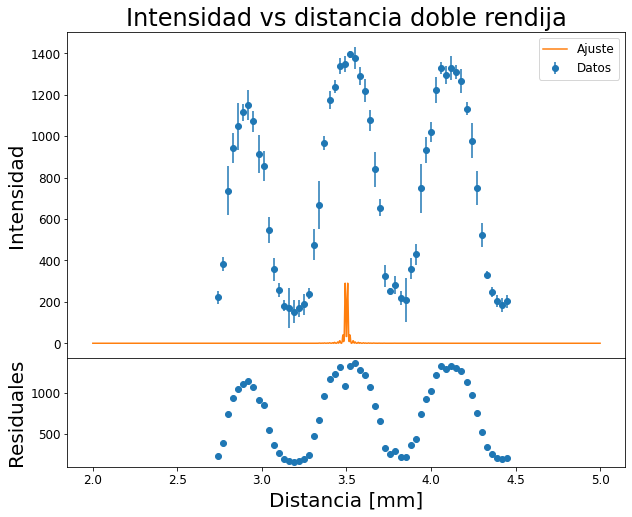

In [33]:
x = df['Longitud']  # reemplaza 'Longitud' con el nombre de tu columna de posiciones
I = df['Promedio']  # reemplaza 'Promedio' con el nombre de tu columna de intensidades
I_err = df['Desviacion']  # reemplaza 'Desviacion' con el nombre de tu columna de errores

# Ajustar los datos
popt, pcov = curve_fit(interferencia, x, I, p0=[400e-9])
# Calcular los residuales
residuales = df['Promedio'] - interferencia(df['Longitud'], *popt)

# Graficar los datos, el ajuste y los residuales
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(df['Longitud'], df['Promedio'], yerr=df['Desviacion'], fmt='o', label='Datos')
ax[0].plot(np.linspace(2, 5, 1000), interferencia(np.linspace(2, 5, 1000), popt[0]), label='Ajuste')
ax[0].legend()

ax[0].set_ylabel('Intensidad')
ax[1].set_xlabel('Distancia [mm]')
ax[1].set_ylabel('Residuales')
ax[0].set_title('Intensidad vs distancia doble rendija')

ax[1].plot(df['Longitud'], residuales, 'o', label='Residuales')

plt.subplots_adjust(hspace=0)
plt.savefig("Doble Rendija.png")

# Imprimir la longitud de onda
print(f"La longitud de onda es: {popt}")

In [34]:
print(popt)

[1.52445468e-06]


## Unica rendija

La longitud de onda es: 0.0003876471476197732


701.0

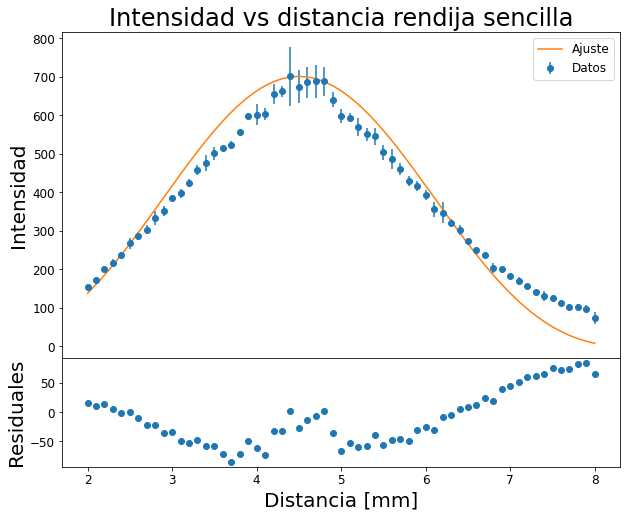

In [35]:
# Leer los datos desde un archivo de Excel
df = pd.read_excel('datos.xlsx', sheet_name = 1)

# Calcular el promedio y la desviación estándar
df['Promedio'] = df[['Medida1', 'Medida2', 'Medida3', 'Medida4', 'Medida5']].mean(axis=1)
df['Desviacion'] = df[['Medida1', 'Medida2', 'Medida3', 'Medida4', 'Medida5']].std(axis=1)
I0 = max(df['Promedio'])

# Definir la función de Fresnel para la difracción de una sola rendija
def fresnel(x, lambda_):
    theta = (x - x0)  # Aproximación lineal para sin(theta)
    num = np.sin(theta * np.pi * a / lambda_)
    denom = (theta * np.pi * a / lambda_)
    
    con_a = (num/denom)**2
    return I0 * con_a

# Valores de los parámetros
a = 0.1e-3  # en metros
x0 = 4.5  # Valor alrededor del cual se realiza la aproximación

# Ajustar los datos
popt, pcov = curve_fit(fresnel, df['Longitud'], df['Promedio'], p0 = [400e-9])

# Calcular los residuales
residuales = df['Promedio'] - fresnel(df['Longitud'], *popt)

# Graficar los datos, el ajuste y los residuales
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(df['Longitud'], df['Promedio'], yerr=df['Desviacion'], fmt='o', label='Datos')
ax[0].plot(np.linspace(2, 8, 1000), fresnel(np.linspace(2, 8, 1000), popt[0]), label='Ajuste')
ax[0].legend()

ax[0].set_ylabel('Intensidad')
ax[1].set_xlabel('Distancia [mm]')
ax[1].set_ylabel('Residuales')
ax[0].set_title('Intensidad vs distancia rendija sencilla')

ax[1].plot(df['Longitud'], residuales, 'o', label='Residuales')

plt.subplots_adjust(hspace=0)
plt.savefig("Rendija Simple.png")

# Imprimir la longitud de onda
print(f"La longitud de onda es: {popt[0]}")
I0

In [30]:
from sklearn.metrics import r2_score

# Asumiendo que 'y' son tus datos observados y 'y_pred' son tus datos predichos por el modelo
y = df["Promedio"]  # reemplaza esto con tus datos observados
y_pred = interferencia(df["Longitud"], popt[0])
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y, y_pred)

print(f"El coeficiente de determinación (R^2) es: {r2}")


El coeficiente de determinación (R^2) es: -0.8323508201429479
